Importing **pandas, NumPy, Matplotlib, and Seaborn**, then reading manufacturing_data.csv into a pandas DataFrame and prints the first Two rows to preview the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("/content/manufacturing_data.csv")
df.head(2)

,Record Date,Fiscal Quarter,Production Dept,Day Of Week,Team,Planned Efficiency,Standard Minute Value,Work In Progress,Over Time Minutes,Performance Bonus,Idle Minutes,Idle Workers,Style Change Count,Worker Count,Efficiency Score
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359


**Counting** the number of **missing values** per column and **visualising** the missing‑data pattern with a **HeatMap** Graph.

Record Date                0
Fiscal Quarter             0
Production Dept            0
Day Of Week                0
Team                       0
Planned Efficiency         0
Standard Minute Value      0
Work In Progress         506
Over Time Minutes          0
Performance Bonus          0
Idle Minutes               0
Idle Workers               0
Style Change Count         0
Worker Count               0
Efficiency Score           0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

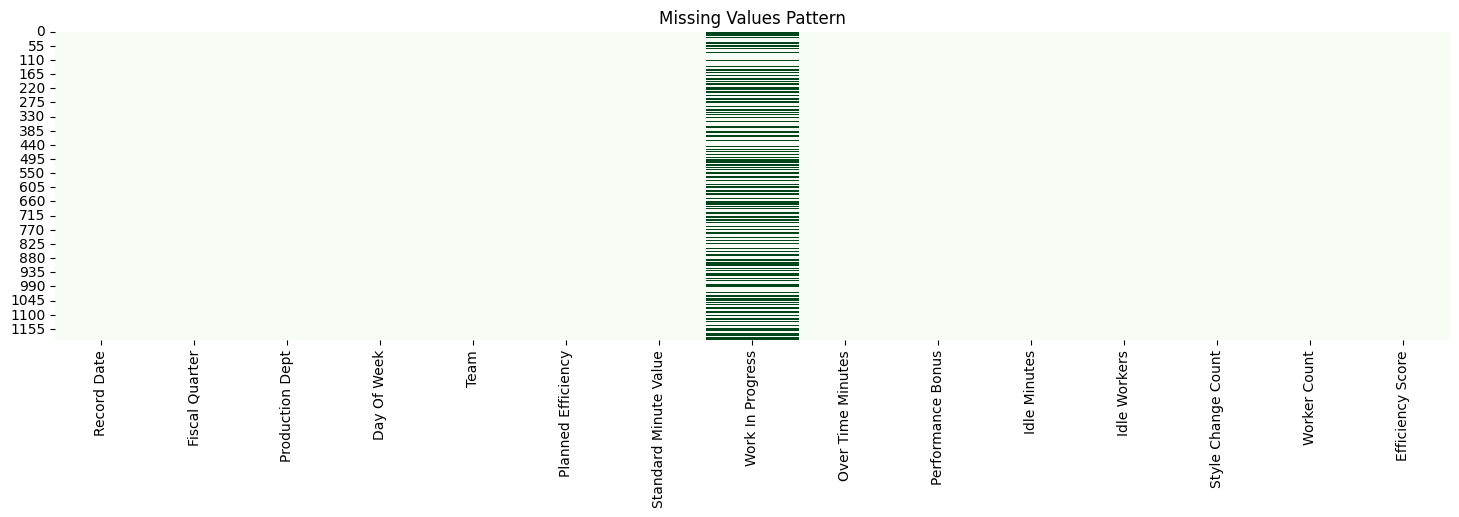

In [ ]:
missing_val = df.isnull().sum()
print(missing_val)

plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Greens')
plt.title('Missing Values Pattern')
plt.show

**Efficiency Score** against **Frequency Graph.**

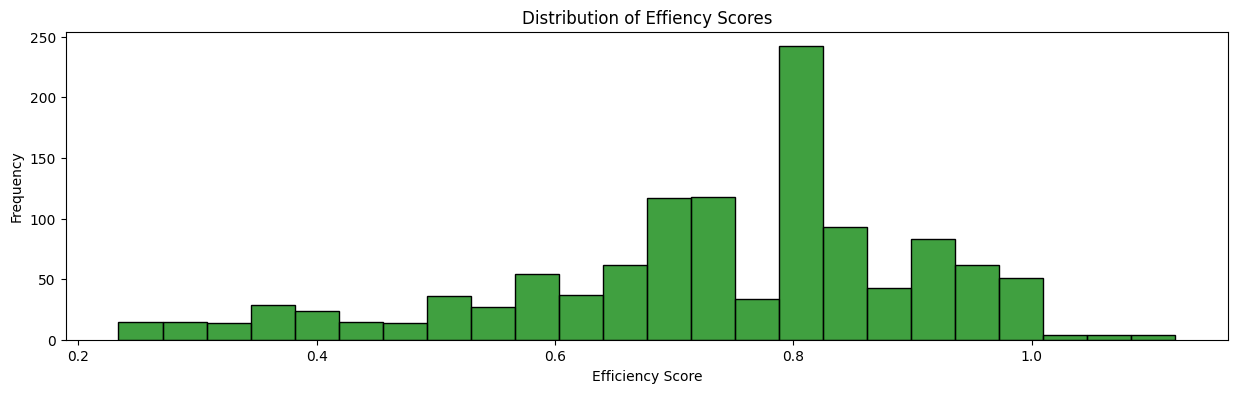

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(df['Efficiency Score'], color ='green')
plt.title('Distribution of Effiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Frequency')
plt.show()

**Counting** of Different values in **Fiscal Quarter** column.

In [ ]:
df['Fiscal Quarter'].value_counts()

,count
Fiscal Quarter,
Q1,360
Q2,335
Q4,248
Q3,210
Q5,44


**Counting** of Different values in **Production Dept** column.

In [ ]:
df['Production Dept'].value_counts()

,count
Production Dept,
Stitching Unit,691
Finishing & Quality,257
Finishing & Quality,249


**Counting** of Different values in **Day Of Week** column.

In [ ]:
df['Day Of Week'].value_counts()

,count
Day Of Week,
Wednesday,208
Sunday,203
Tuesday,201
Monday,199
Thursday,199
Saturday,187


**Counting** of Different values in **Team** column.

In [ ]:
df['Team'].value_counts()

,count
Team,
Line-S2,109
Line-C2,109
Line-S1,105
Line-F1,105
Line-Q1,104
Line-Q2,100
Line-P2,99
Line-C1,96
Line-S3,95


**Counting** of Different values in **Style Change Count** column.

In [ ]:
df['Style Change Count'].value_counts()

,count
Style Change Count,
No Style Change,1050
Minor Style Revision,114
Major Design Shift,33


**Correlation Matrix**


1. Panned Efficiency is Maximum Correlated to Efficiency Score.



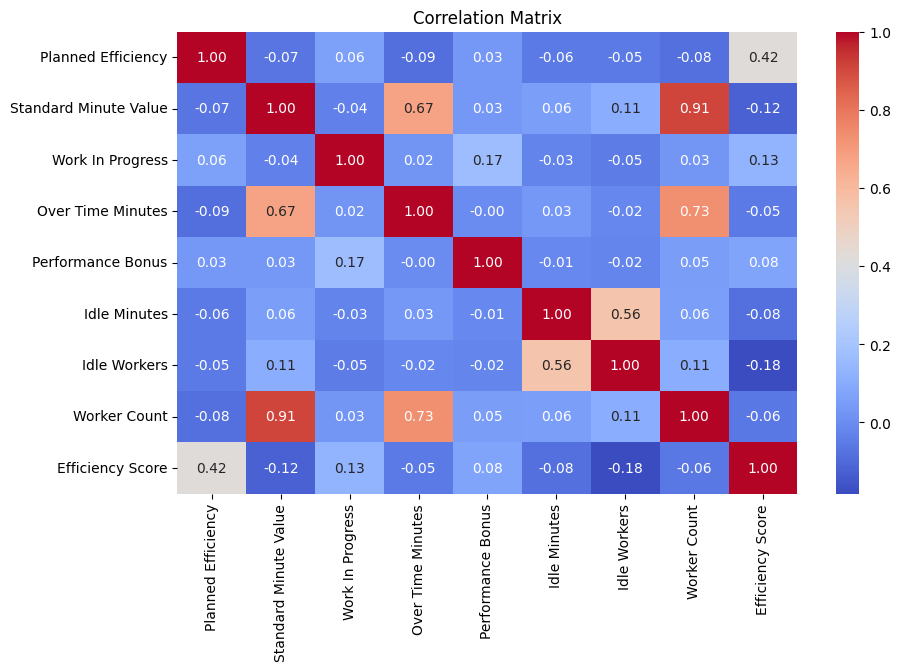

In [ ]:
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Planned Efficiency vs Efficiency Score

1. **Both Sticthing and Finishing** shows **Positive Trend** as **high Planned Efficiency then high Efficiency Score.**
2. **Finishing & Quality** have **slightly higher Score** as compared to **Stitching Unit.**



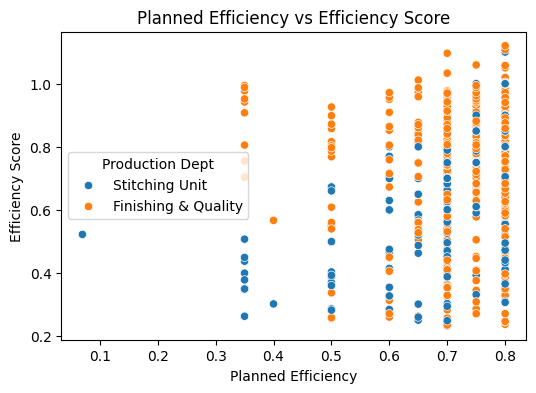

In [ ]:
df['Production Dept'] = df['Production Dept'].str.strip()
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Planned Efficiency', y='Efficiency Score', hue='Production Dept')
plt.title('Planned Efficiency vs Efficiency Score')
plt.show()

**Efficiency Score by Fiscal Quarter**
1. Finishing & Quality shows higher median efficiency across most quarters compared to the stitching unit.
2. Stitching unit has more outliers, suggesting occasional dips or inconsistent performance.

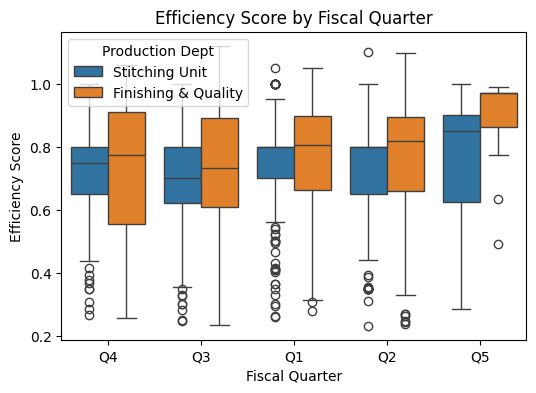

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Fiscal Quarter', y='Efficiency Score', hue='Production Dept')
plt.title('Efficiency Score by Fiscal Quarter')
plt.show()

**Efficiency Score by Style Change Count**


1. No style change has Highest efficiency score, few outliers on the lower side indicate occasional drops but overall strong performance.
2. Minor Style revision slight drop in efficiency compared to No Style change.




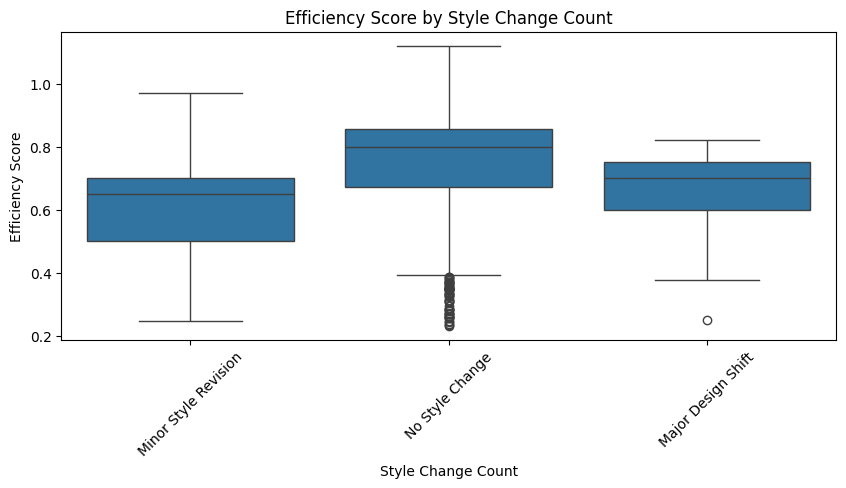

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Style Change Count', y='Efficiency Score')
plt.title('Efficiency Score by Style Change Count')
plt.xticks(rotation=45)
plt.show()

**Average Efficiency Score by Day of Week**

1. Friday is not a working day for the company.



/tmp/ipython-input-860982933.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day Of Week', y='Efficiency Score', estimator='mean', ci=None)


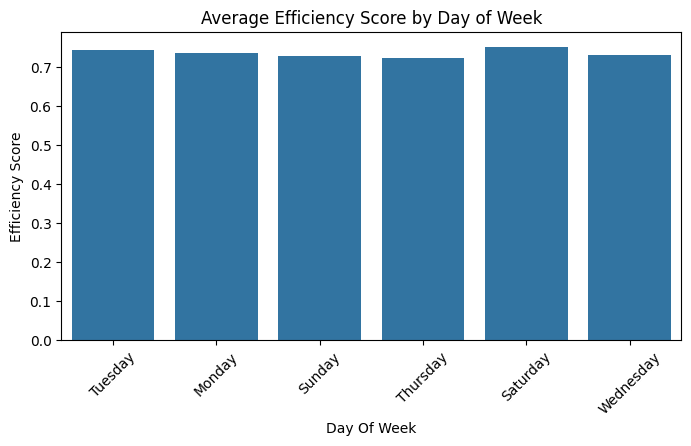

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Day Of Week', y='Efficiency Score', estimator='mean', ci=None)
plt.title('Average Efficiency Score by Day of Week')
plt.xticks(rotation=45)
plt.show()

**Over Time Minutes vs Efficiency Score Graph**

1. No strong Correlation between Efficiency Score and Over Time.
2. Stitching Unit has slightly negative line indicating overtime does not improve efficiency score.
3. Finishing Unit has slightly positive line indicating a small improvement in efficiency score with over time.



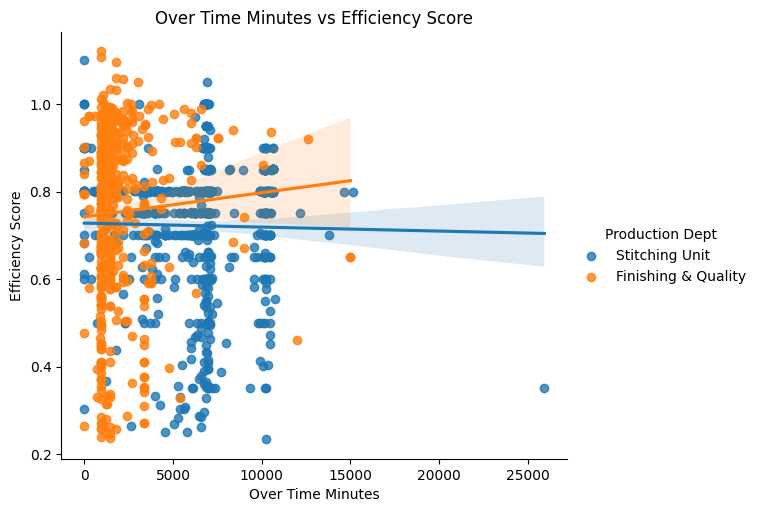

In [ ]:
sns.lmplot(data=df, x='Over Time Minutes', y='Efficiency Score', hue='Production Dept', aspect=1.2)
plt.title('Over Time Minutes vs Efficiency Score')
plt.show()

**Worker Count vs Efficiency Score**

1. For Finishing & Quality there is positive correlation between worker count and efficiency score indicating as the number of workers increases, the efficiency score tends to rise.
2. For Stitching unit the trend is almost flat indicating no relationship between worker count and efficiency.



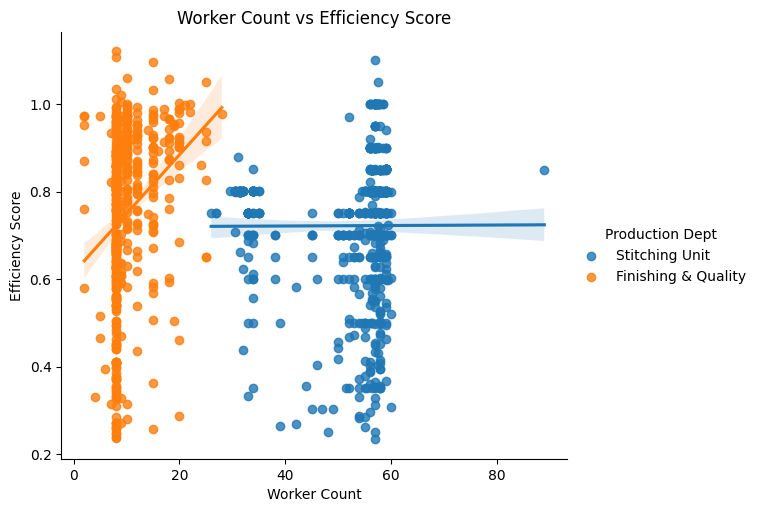

In [ ]:
sns.lmplot(data=df, x='Worker Count', y='Efficiency Score', hue='Production Dept', aspect=1.2)
plt.title('Worker Count vs Efficiency Score')
plt.show()

**Idle Minutes vs Efficiency Score**


1. Most data points are near zero minutes indicating that both departments operate with minimal idle minutes.
2. The few cases with higher idle minutes correspond to lower efficiency scores, particularly in the Stitching Unit.



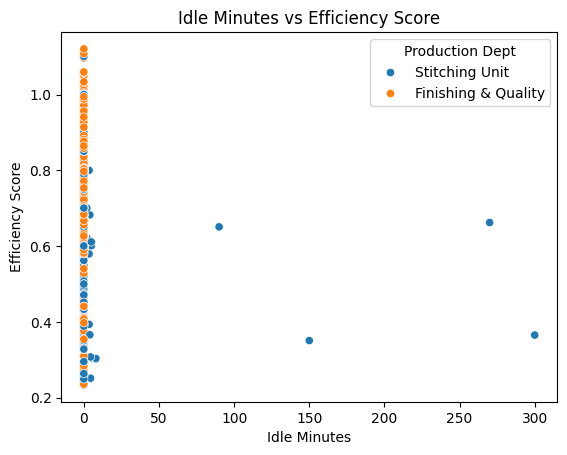

In [ ]:
sns.scatterplot(data=df, x='Idle Minutes', y='Efficiency Score', hue='Production Dept')
plt.title('Idle Minutes vs Efficiency Score')
plt.show()

**Average Efficiency by Department**


* Finishing & Quality has slightly Better Score with respect to Stitching unit.



/tmp/ipython-input-1141323788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_eff, x='Efficiency Score', y='Production Dept', palette='Blues_r')


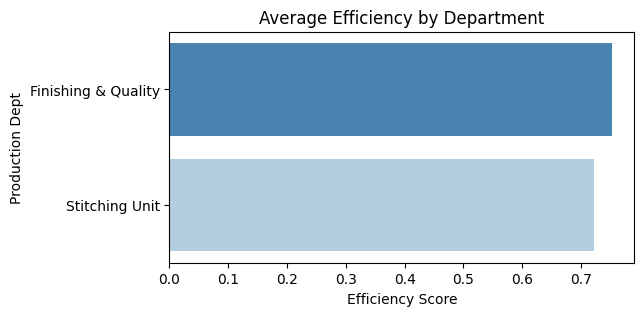

In [ ]:
dept_eff = df.groupby('Production Dept')['Efficiency Score'].mean().reset_index().sort_values(by='Efficiency Score', ascending=False)
plt.figure(figsize=(6,3))
sns.barplot(data=dept_eff, x='Efficiency Score', y='Production Dept', palette='Blues_r')
plt.title('Average Efficiency by Department')
plt.show()

Average Efficiency by Team


1. Line-S1 and Line-S3 have the highest average efficiency scores.
2. Teams like Line-C1, Line-C2, and Line-P1 have the lowest efficiency scores.



/tmp/ipython-input-2635800742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_eff, x='Team', y='Efficiency Score', palette='cool')


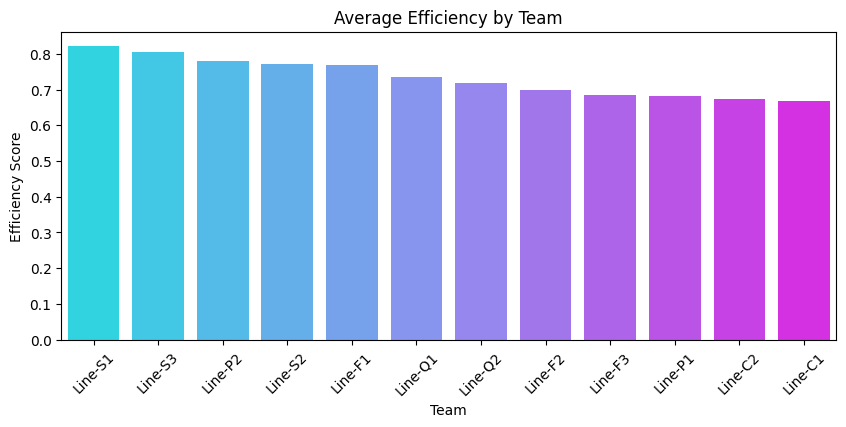

In [ ]:
team_eff = df.groupby('Team')['Efficiency Score'].mean().reset_index().sort_values(by='Efficiency Score', ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(data=team_eff, x='Team', y='Efficiency Score', palette='cool')
plt.title('Average Efficiency by Team')
plt.xticks(rotation=45)
plt.show()